In [ ]:
# outlier detection , row wise-removing/trimming & capping (winsorization)

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer

In [3]:
data=pd.read_csv('weight-height.csv')

In [4]:
data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


{'whiskers': [<matplotlib.lines.Line2D at 0x17bb417cfb0>,
 'caps': [<matplotlib.lines.Line2D at 0x17bb417d550>,
 'boxes': [<matplotlib.lines.Line2D at 0x17bb417cc80>],
 'medians': [<matplotlib.lines.Line2D at 0x17bb417db50>],
 'fliers': [<matplotlib.lines.Line2D at 0x17bb417de20>],
 'means': []}

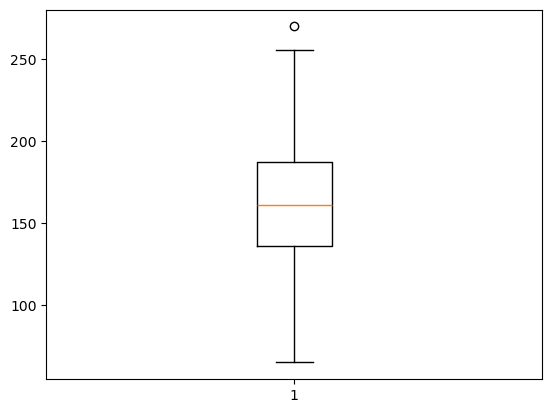

In [5]:
# how to find outlier
plt.boxplot(data['Weight'])

{'whiskers': [<matplotlib.lines.Line2D at 0x17bb4989cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x17bb498a2a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17bb4989760>],
 'medians': [<matplotlib.lines.Line2D at 0x17bb498a840>],
 'fliers': [<matplotlib.lines.Line2D at 0x17bb498ab10>],
 'means': []}

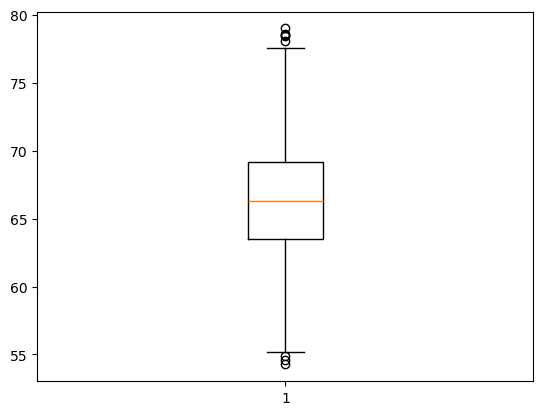

In [6]:
plt.boxplot(data['Height'])

In [7]:
UL = data["Height"].mean()+3*data["Height"].std()

In [8]:
UL

77.91014411714094

In [9]:
LL = data["Height"].mean()-3*data["Height"].std()

In [10]:
LL

54.82497539250154

In [11]:
# data.describe()

In [12]:
data[(data['Height']>UL) | (data['Height']<LL)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


# removing/trimming


In [13]:
k=data[(data['Height']<=UL) & (data['Height']>=LL)]

In [14]:
d=pd.DataFrame(k , columns=['Height'])

In [15]:
d

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796
...,...
9995,66.172652
9996,67.067155
9997,63.867992
9998,69.034243


{'whiskers': [<matplotlib.lines.Line2D at 0x17bb4a05430>,
 'caps': [<matplotlib.lines.Line2D at 0x17bb4a05910>,
 'boxes': [<matplotlib.lines.Line2D at 0x17bb498ae10>],
 'medians': [<matplotlib.lines.Line2D at 0x17bb4a05e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x17bb4a060c0>],
 'means': []}

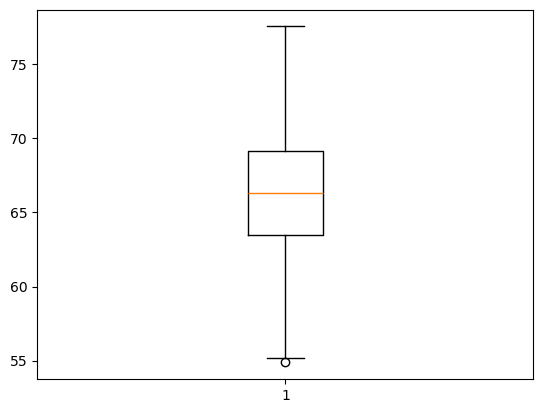

In [16]:
plt.boxplot(d['Height'])

In [17]:
# capping(winsorization)

In [19]:
data['Height']=np.where(data['Height']>UL,UL,np.where(data['Height']<LL,LL,data["Height"]))

In [21]:
data['Height']

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 10000, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x17bb41d6870>,
 'caps': [<matplotlib.lines.Line2D at 0x17bb41d6db0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17bb41d65d0>],
 'medians': [<matplotlib.lines.Line2D at 0x17bb41d72f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x17bb41d75c0>],
 'means': []}

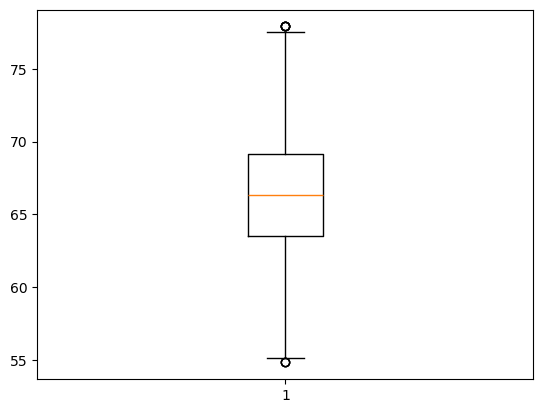

In [22]:
plt.boxplot(data["Height"])